In [634]:
from IPython.display import Image

Image(url='https://img4.cityrealty.com/neo/i/p/mig/airbnb_guide.jpg')

# <font color = 'blue'> AirBnB Data Analysis 
    

### <font color='blue'>Content: 
We are focusing on California’s data for analysis. Being new to California, it would be interesting to learn about places which people prefer for AirBnb in California. Our main focus was around affordability, customer preference for AirBnb property based on customer reviews and how close are these AirBnb properties from airport, beach and other touristy location.

### <font color='blue'>Dataset:
https://www.kaggle.com/gkdoad/airbnb

### <font color='blue'>Team:
<ol>
<li> Resham Uttamchandani</li>
<li> Mukesh Ganesh</li>
<li> Pratiksha Raval</li>
<li> Dnyanai Surkutwar</li>
</ol>

### <font color='blue'>Following are a few questions that we aim to answer through our analysis:
<ol>
<li>Affordability analysis: How do prices of listings vary by location?</li>
<li>Predicting the next airbnb listing price range.</li> 
<li>Airbnb property preference based on cutomer reviews.</li>
<li>What are the different types of properties in and around LA? Do they vary by neighborhood?</li>
<li>What localities are rated highly by guests?</li>
<li>Customer preference based Airbnb recommendations.</li>  
</ol>


##### <font color='blue'> Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import branca

pd.set_option('display.max_columns',50)
pd.options.display.max_rows

60

##### <font color='blue'> Setting the map location co-ordinates for the map graphs later

In [2]:
# Setting a base map
lat = 34.1000
long = -118.4662

##### <font color='blue'> Read the listings csv file and setting the index column as id 

In [3]:
initFile = pd.read_csv('listings.csv',index_col= 'id',low_memory=False)
initFile.head(1)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,https://www.airbnb.com/rooms/109,20190708161040,2019-07-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,...,2019-07-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02


##### <font color='blue'> Description of Data
<ol>
<font color='blue'><li>The dataset comprises of three main tables:</li></font>
<ul>
<font color='blue'><li>listings -</li></font> Detailed listings data showing 106 atttributes for each of the listings. Some of the attributes used in the analysis are price, longitude, latitude, listing_type (categorical),neighbourhood_cleansed(categorical), ratings among others.
<font color='blue'><li>reviews -</li></font> Detailed reviews given by the guests with 6 attributes. Key attributes include review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, cancellation_policy.
</ul>
<br>
</ol>

<font color='blue'>                          
2. A quick glance at the data shows that there are:</font>
<ul>
<li>Most of the listings in California are based in and near LA, predominately in LA county. 
<li>Over 35,959 reviews have been written by guests since 26th May 2009.</li>
<li>The price for a listing ranges from 10 per night to 25,000 dollars(!) per night. Listing with $25,000 price tag are in Hollywood hills west.</li>
</ul>

In [113]:
initFile.first_review.count()

35959

In [115]:
initFile.first_review.sort_values(ascending=True).head(1)

id
10    2009-05-26
Name: first_review, dtype: object

In [4]:
initFile.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,https://www.airbnb.com/rooms/109,20190708161040,2019-07-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,...,2019-07-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
344,https://www.airbnb.com/rooms/344,20190708161040,2019-07-09,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,...,2019-07-09,6,2,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.16
2708,https://www.airbnb.com/rooms/2708,20190708161040,2019-07-09,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,NaN,NaN,https://a0.muscache.com/im/pictures/40618141/2...,NaN,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,...,2019-07-09,20,11,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.32
2732,https://www.airbnb.com/rooms/2732,20190708161040,2019-07-09,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,NaN,NaN,NaN,NaN,ABOUT YOU. Friendly travelers or people comin...,NaN,NaN,https://a0.muscache.com/im/pictures/1082974/0f...,NaN,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and m

##### <font color='blue'> Reseting the index and assigning a new column as the dataset id 

In [5]:
initFile.reset_index(inplace=True)

In [6]:
initFile['colid'] = initFile.index 

In [7]:
initFile.drop('id',axis=1,inplace=True)

In [8]:
initFile.rename(columns={'colid':'id'},inplace=True)
initFile.id +=1

In [9]:
initFile.set_index('id',inplace=True)
initFile.head(1)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,https://www.airbnb.com/rooms/109,20190708161040,2019-07-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,...,2019-07-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02


##### <font color='blue'> Cleaning the dataset to make sure we have only CA related values

In [16]:
df = initFile.copy()

In [17]:
### Taking only the CA listings and making sure everything in state as uppercase
df.state.loc[df.state=='California'] = 'CA'
df.state.unique()
df.state = df['state'].str.upper()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [122]:
## As we can see there are some unwanted & non-CA entries in the state column
df.state.value_counts()

CA    44599
Name: state, dtype: int64

##### <font color = 'blue'> We need to remove the non-CA values from the dataset

In [19]:
df.drop(df[~(df.state.values=='CA')].index,axis=0,inplace=True)

##### <font color='blue'> Convert the city column to lower case

In [21]:
df.city = df.city.str.lower()
df.city.unique()
df.city.dropna(inplace=True)

##### <font color='blue'> Cleaning the city column and dropping NaN values in city column 

In [22]:
df['city'] = df['city'].str.replace(r'[^\x00-\x7F]+', '')
df.city.dropna(inplace=True)
df.city.value_counts()

los angeles                27933
long beach                  1612
santa monica                1059
west hollywood               973
beverly hills                767
                           ...  
los angeles/ hollywood         1
venice , los angeles           1
rowland heigh                  1
santa monica                   1
los angels                     1
Name: city, Length: 334, dtype: int64

In [23]:
df.groupby('city')['neighbourhood_cleansed'].value_counts()

city                         neighbourhood_cleansed   
                             Rowland Heights              5
                             Monterey Park                2
                             El Monte                     1
                             Hacienda Heights             1
                             Rosemead                     1
                                                         ..
woodland hills, los angeles  Woodland Hills               1
woodland hills/los angeles   Woodland Hills               1
woodland hls                 Woodland Hills               1
wrightwood                   Angeles Crest                2
                             Southeast Antelope Valley    1
Name: neighbourhood_cleansed, Length: 857, dtype: int64

In [24]:
df.smart_location.shape

(44611,)

In [25]:
df.smart_location = df.smart_location.str.lower()

In [27]:
df.isnull().sum()

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               6
summary                                         1787
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               8658
Length: 105, dtype: int64

##### <font color='blue'> Cleaning the smart_location column, removing the non-English characters in the smart_location column 

In [28]:
df.drop(df[(df['smart_location'] == '蒙特利帕克, ca') | \
                       (df['smart_location'] == '因達斯特里, ca') | \
                       (df['smart_location'] == '艾尔蒙地, ca') | \
                       (df['smart_location'] == '沃尔纳特, ca') | \
                       (df['smart_location'] == '哈仙达岗, ca') | \
                       (df['smart_location'] == '罗兰高地, ca') | \
                       (df['smart_location'] == '罗兰岗, ca') | \
                       (df['smart_location'] == '天普市, ca') | \
                       (df['smart_location'] == '洛杉矶, ca')  \
                      ].index, inplace = True)

##### <font color='blue'> Replacing ', ca' in smart_location column so that it is uniform with the other location related columns 

In [123]:
df.smart_location = df.smart_location.str.replace(', ca',' ', regex=True)
df.smart_location = df.smart_location.str.strip()
## Removing the spaces from the neighbourhood_cleansed
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.strip()

In [126]:
## Convert smart_location and neighbourhood_cleansed columns into lower case
df.smart_location = df.smart_location.str.lower()
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.lower() 
df.head(2)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,https://www.airbnb.com/rooms/109,20190708161040,2019-07-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,...,2019-07-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
2,https://www.airbnb.com/rooms/344,20190708161040,2019-07-09,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,...,2019-07-09,6,2,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.16


#### <font color='green'>Make a dataset copy for Interesting Fact 1 which is focused on:
<font color='green'>1)Affordability analysis: How do prices of listings vary by location</font><br>
<font color='green'>2)Building an autoML solution and testing to see if it is a good solution to invest in for making the priceType tags for the listings.</font>


### <font color='black'> 1) Affordability analysis: How do prices of listings vary by location

In [150]:
df1 = df[['price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',\
          'maximum_nights','amenities','neighbourhood_cleansed',\
       'state','zipcode','latitude','longitude']].copy()
## Renaming the neighbourhood_cleansed column to location 
df1.rename(columns={'neighbourhood_cleansed':'location'},inplace=True)

In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44599 entries, 1 to 44620
Data columns (total 13 columns):
price               44599 non-null object
security_deposit    33821 non-null object
cleaning_fee        38680 non-null object
guests_included     44599 non-null int64
extra_people        44599 non-null object
minimum_nights      44599 non-null int64
maximum_nights      44599 non-null int64
amenities           44599 non-null object
location            44599 non-null object
state               44599 non-null object
zipcode             44058 non-null object
latitude            44599 non-null float64
longitude           44599 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


In [152]:
df1.isna().sum()
## We see that we have NaN values in the security_deposit, cleaning_fee, zipcode columns 
## So, lets clean these columns 

price                   0
security_deposit    10778
cleaning_fee         5919
guests_included         0
extra_people            0
minimum_nights          0
maximum_nights          0
amenities               0
location                0
state                   0
zipcode               541
latitude                0
longitude               0
dtype: int64

In [153]:
## Lets see what the amenities column holds..
df1.groupby('amenities')['price'].value_counts().nlargest(3)

amenities                                                                                                                                                                                                                                                                          price 
{Wifi,"Air conditioning",Kitchen,Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Hair dryer"}                                                                                                             $15.00    22
{Wifi,Kitchen,Heating,"Smoke detector","First aid kit","Fire extinguisher",Essentials,"Hair dryer","Laptop friendly workspace","Hot water","Bed linens",Microwave,"Dishes and silverware",Oven,Stove,"Long term stays allowed"}                                                    $23.00    21
{Internet,Wifi,"Air conditioning",Kitchen,"Free parking on premises",Breakfast,"Free street parking",Heating,Washer,Dryer,"Smoke detector","Fi

##### <font color='blue'> Cleaning the Amenities column and converting it to lower case

In [154]:
df1.amenities = df1.amenities.str.strip('{}')
df1.amenities = df1.amenities.str.replace('"','')
df1.amenities = df1.amenities.str.lower()

##### <font color='blue'> Trying to understand which are the more frequently used values in the amenities column 

In [155]:
pd.Series(' '.join(df1['amenities']).lower().split(',')).value_counts().nlargest(12)

essentials                  41874
smoke detector              41056
kitchen                     39511
heating                     39426
hangers                     37406
wifi                        37090
shampoo                     35286
carbon monoxide detector    34568
air conditioning            33841
washer                      33837
hair dryer                  33685
dryer                       33251
dtype: int64

##### <font color='blue'> Creating new coulmns around most frequently used values in the Amenities column 

In [156]:
## Taking the most sort after amenities by customers and creating new columns for them 
df1['wifi'] = ''
df1['ac'] = ''
df1['pet'] = ''
df1['park'] = ''
df1['htub'] = ''
df1['dishwasher'] = ''
df1['bbq'] = ''
df1['pool'] = ''
df1['hr'] = ''
df1['coffee'] = ''
df1['heating'] = ''
df1['iron'] = ''
df1['washer'] = ''
df1['dryer'] = ''
df1['parking'] = ''

##### <font color='blue'> If the amenities satisfy the condition of being present in the Amenities column then set the column as 'True'

In [157]:
df1.wifi = df1.amenities.str.contains("wifi").apply(lambda x: 'wifi' if x==True else '')
df1.ac = df1.amenities.str.contains("air conditioning").apply(lambda x: 'air conditioning' if x==True else '')
df1.pet = df1.amenities.str.contains("pet").apply(lambda x: 'pet' if x==True else '')
df1.park = df1.amenities.str.contains("park").apply(lambda x: 'park' if x==True else '')
df1.htub = df1.amenities.str.contains("hot tub").apply(lambda x: 'hot tub' if x==True else '')
df1.dishwasher = df1.amenities.str.contains("dishwasher").apply(lambda x: 'dishwasher' if x==True else '')
df1.bbq = df1.amenities.str.contains("bbq").apply(lambda x: 'BBQ' if x==True else '')
df1.pool = df1.amenities.str.contains("pool").apply(lambda x: 'pool' if x==True else '')
df1.hr = df1.amenities.str.contains("24-hour check-in").apply(lambda x: '24-hour check-in' if x==True else '')
df1.coffee = df1.amenities.str.contains("coffee").apply(lambda x: 'coffee' if x==True else '')
df1.heating = df1.amenities.str.contains("heating").apply(lambda x: 'heating' if x==True else '')
df1.iron = df1.amenities.str.contains("iron").apply(lambda x: 'iron' if x==True else '')
df1.washer = df1.amenities.str.contains("washer").apply(lambda x: 'washer' if x==True else '')
df1.dryer = df1.amenities.str.contains("dryer").apply(lambda x: 'dryer' if x==True else '')
df1.parking = df1.amenities.str.contains("parking").apply(lambda x: 'parking' if x==True else '')

##### <font color='blue'> Drop the old amenities column as we have made columns for amenities and did one-hot encoding

In [158]:
df1.drop('amenities',axis=1,inplace=True)

##### <font color='blue'> Adding amenities to the Amenities column 

In [159]:
df1['amenities'] = df1.wifi+' '+df1.ac+' '+df1.pet+' '+df1.park+' '+\
df1.htub+' '+df1.dishwasher+' '+df1.bbq+' '+df1.pool+' '+df1.hr+' '+df1.coffee+' '+\
df1.heating+' '+df1.iron+' '+df1.washer+' '+df1.dryer+' '+df1.parking


##### <font color='blue'> Converting the individual amenities columns using one-hot encoding 

In [160]:
df1.wifi = df1.wifi.apply(lambda x: 1 if x=='wifi' else 0)
df1.ac = df1.ac.apply(lambda x: 1 if x=='air conditioning' else 0)
df1.pet = df1.pet.apply(lambda x: 1 if x=='pet' else 0)
df1.park = df1.park.apply(lambda x:1 if x=='park' else 0)
df1.htub = df1.htub.apply(lambda x:1 if x=='hot tub' else 0)
df1.dishwasher = df1.dishwasher.apply(lambda x:1 if x=='dishwasher' else 0)
df1.bbq = df1.bbq.apply(lambda x:1 if x=='BBQ' else 0)
df1.pool = df1.pool.apply(lambda x:1 if x=='pool' else 0)
df1.hr = df1.hr.apply(lambda x:1 if x=='24-hour check-in' else 0)
df1.coffee = df1.coffee.apply(lambda x:1 if x=='coffee' else 0)
df1.heating = df1.heating.apply(lambda x:1 if x=='heating' else 0)
df1.iron = df1.iron.apply(lambda x:1 if x=='iron' else 0)
df1.washer = df1.washer.apply(lambda x:1 if x=='washer' else 0)
df1.dryer = df1.dryer.apply(lambda x:1 if x=='dryer' else 0)
df1.parking = df1.parking.apply(lambda x:1 if x=='parking' else 0)


In [161]:
df1.isna().sum()

price                   0
security_deposit    10778
cleaning_fee         5919
guests_included         0
extra_people            0
minimum_nights          0
maximum_nights          0
location                0
state                   0
zipcode               541
latitude                0
longitude               0
wifi                    0
ac                      0
pet                     0
park                    0
htub                    0
dishwasher              0
bbq                     0
pool                    0
hr                      0
coffee                  0
heating                 0
iron                    0
washer                  0
dryer                   0
parking                 0
amenities               0
dtype: int64

##### <font color='blue'> Working on the security_deposit column and adjusting its NaN values

In [162]:
## Removing the '$' & ',' symbols form the security_deposit column 
df1.security_deposit = df1.security_deposit.str.strip('$')
df1.security_deposit = df1.security_deposit.str.replace(',','')

In [163]:
## Converting the security_deposit column to Float from str
df1.security_deposit = df1.security_deposit.astype('float64')

In [164]:
## Understanding the security_deposit column using describe()
df1.security_deposit.describe()

count     33821.000000
mean        435.482008
std        2283.420823
min           0.000000
25%           0.000000
50%         200.000000
75%         450.000000
max      250000.000000
Name: security_deposit, dtype: float64

In [165]:
## Rounding the security_deposit column values after filling the NaN values to mean() of
## the security_deposit values
df1.security_deposit.fillna(round(df1.security_deposit.mean(),2),inplace=True)

##### <font color='blue'> Working on the cleaning_fee column and adjusting its NaN values

In [166]:
## Understanding the cleaning_fee column using describe()
df1.cleaning_fee.describe()

count      38680
unique       301
top       $50.00
freq        2977
Name: cleaning_fee, dtype: object

In [167]:
df1.cleaning_fee.isna().sum()

5919

In [168]:
## Removing the '$' & ',' symbols form the cleaning_fee column 
df1.cleaning_fee = df1.cleaning_fee.str.strip('$')
df1.cleaning_fee = df1.cleaning_fee.str.replace(',','')

In [169]:
## Converting the cleaning_fee column to Float from str
df1.cleaning_fee = df1.cleaning_fee.astype('float64')

In [170]:
## Understanding the cleaning_fee column using describe()
df1.cleaning_fee.describe()

count    38680.000000
mean        87.038573
std         93.339460
min          0.000000
25%         30.000000
50%         65.000000
75%        100.000000
max       2500.000000
Name: cleaning_fee, dtype: float64

In [171]:
## Converting the cleaning_fee column NaN values to the mean() of values in that column
df1.cleaning_fee.fillna(round(df1.cleaning_fee.mean(),2),inplace=True)

In [172]:
## Describing the cleaning_fee column after filling the NaN values in the column
df1.cleaning_fee.describe()

count    44599.000000
mean        87.038762
std         86.925103
min          0.000000
25%         35.000000
50%         75.000000
75%        100.000000
max       2500.000000
Name: cleaning_fee, dtype: float64

In [173]:
df1.isna().sum()

price                 0
security_deposit      0
cleaning_fee          0
guests_included       0
extra_people          0
minimum_nights        0
maximum_nights        0
location              0
state                 0
zipcode             541
latitude              0
longitude             0
wifi                  0
ac                    0
pet                   0
park                  0
htub                  0
dishwasher            0
bbq                   0
pool                  0
hr                    0
coffee                0
heating               0
iron                  0
washer                0
dryer                 0
parking               0
amenities             0
dtype: int64

##### <font color='blue'> Checking the zipcode column and its NaN values

In [ ]:
df1.zipcode.isna().sum()

In [242]:
df1.zipcode.dropna(inplace=True)

In [243]:
df1.shape

(44599, 28)

##### <font color='blue'> Checking the price column

In [244]:
## Removing the '$' & ',' symbols form the price column 
df1.price = df1.price.str.strip('$')
df1.price = df1.price.str.replace(',','')

In [245]:
## Converting the price column to Float from str
df1.price = df1.price.astype('float64')

In [288]:
## Understanding the price column using describe()
df1.price.describe()

count    44590.000000
mean       211.946019
std        579.117992
min         10.000000
25%         70.000000
50%        110.000000
75%        186.000000
max      25000.000000
Name: price, dtype: float64

In [252]:
## Price '0' makes no sense as the listing need to charge for per night stay and there are
## only 9 values 
df1.drop(df1[df1.price==0].index,axis=0,inplace=True)

In [248]:
df1.price.count()

44590

##### <font color='blue'> Checking the extra_people column and making it numerical 

In [286]:
## Removing the '$' & ',' symbols form the extra_people column 
df1.extra_people = df1.extra_people.str.strip('$')
df1.extra_people = df1.extra_people.str.replace(',','')

In [287]:
## Converting the extra_people column to Float from str
df1.extra_people = df1.extra_people.astype('float64')

In [289]:
## Understanding the extra_people column using describe()
df1.extra_people.describe()

count    44590.000000
mean        15.657547
std         26.988920
min          0.000000
25%          0.000000
50%         10.000000
75%         24.000000
max        300.000000
Name: extra_people, dtype: float64

In [295]:
df1.guests_included.dtype
df1.minimum_nights.dtype
df1.maximum_nights.dtype
## Since the numerical columns are alreay in integer type we do not need to make any change

dtype('int64')

In [296]:
## Converting the df1 to a csv file 
df1.to_csv('AffordabilityDataset.csv',index=False)

##### <font color='blue'> Dividing the price column into 10 equal parts 

In [69]:
pd.qcut(df1.price,10)

id
1          (110.0, 130.0]
2          (160.0, 209.0]
3            (62.0, 79.0]
4          (130.0, 160.0]
5            (79.0, 95.0]
               ...       
44616        (46.0, 62.0]
44617        (46.0, 62.0]
44618    (349.0, 25000.0]
44619       (95.0, 110.0]
44620        (62.0, 79.0]
Name: price, Length: 44590, dtype: category
Categories (10, interval[float64]): [(9.999, 46.0] < (46.0, 62.0] < (62.0, 79.0] < (79.0, 95.0] ... (130.0, 160.0] < (160.0, 209.0] < (209.0, 349.0] < (349.0, 25000.0]]

##### <font color='blue'> Create a new priceType column which will be have price ranges - Low,Mid,High

In [255]:
df1['priceType'] = ''

##### <font color='blue'> Dividing the price column into categories and assigning them a label in the priceType column  

In [256]:
df1.priceType.loc[(df1['price']> 9.999) & (df1['price'] <= 110.0)] = 'Low'#Low
df1.priceType.loc[(df1['price'] > 110.0) & (df1['price'] <= 500.0)] = 'Mid'#Mid
df1.priceType.loc[(df1['price'] > 500.0) & (df1['price'] <= 25000.0)] = 'High'#High

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


##### <font color='blue'> We have created labels based on the Airbnb prices, lets have a look at the airbnb in these particular ranges

In [73]:
df1['mapPriceTags'] = ''

In [74]:
df1.mapPriceTags.loc[(df1['price']> 9.999) & (df1['price'] <= 110.0)] = 1#Low
df1.mapPriceTags.loc[(df1['price'] > 110.0) & (df1['price'] <= 500.0)] = 2#Mid
df1.mapPriceTags.loc[(df1['price'] > 500.0) & (df1['price'] <= 25000.0)] = 3#High

In [257]:
df1.head(1)

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,location,state,zipcode,latitude,longitude,wifi,ac,pet,park,htub,dishwasher,bbq,pool,hr,coffee,heating,iron,washer,dryer,parking,amenities,priceType
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,122.0,500.0,240.0,3,$25.00,30,730,culver city,CA,90230,33.98209,-118.38494,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,wifi air conditioning pet park hot tub pool ...,Mid


##### <font color='blue'> First, we will check for the Low range Airbnb's

In [261]:
## Making a lowRange dataframe which has all the values with the priceType as "Low"
lowRnge = pd.DataFrame(df1[df1.priceType=='Low'])
lowRnge.head(2)

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,location,state,zipcode,latitude,longitude,wifi,ac,pet,park,htub,dishwasher,bbq,pool,hr,coffee,heating,iron,washer,dryer,parking,amenities,priceType
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,79.0,480.0,89.0,1,$0.00,28,366,hollywood,CA,90046,34.09768,-118.34602,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,wifi air conditioning park hot tub dishwasher...,Low
5,80.0,100.0,75.0,1,$25.00,2,730,bellflower,CA,90706,33.87619,-118.11397,1,1,0,1,1,0,0,0,0,0,1,0,1,1,1,wifi air conditioning park hot tub heati...,Low


##### <font color='blue'>Making the map for representing the Low ranged Airbnb listings using folium library 

In [259]:
## Importing the markercluster module from the folium library 
from folium.plugins import MarkerCluster
mc = MarkerCluster()

## Assigning base_low to save the map
### making the world map to zoom on the latitude and longitude of LA county as maximum 
### number of airbnb listings are in LA county.
base_low = folium.Map(location=[lowRnge.latitude.mean(), 
 lowRnge.longitude.mean()], 
 zoom_start=10)##This simply zoom in on the CA state

## For every value in the Low range airbnb's put a popup marker with the Airbnb per night
## prices
for row in lowRnge.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude, row.longitude],popup=row.price))
    
base_low.add_child(mc)    

## Saving the map in html format in the current directory with the name map_lowprices
base_low.save('map_lowprices.html')

##### <div class="alert alert-block alert-danger"> Please note, you might have to run the jupyter notebook to see the map below or refer to the map_<name>.html for map details 

##### <font color='blue'>Now, lets see what kind of rates are included in the price ranges - Low,Mid,High for the top  places in these categories

##### <font color='blue'> Checking the Low price range closely to see what kind of prices in the Low range 

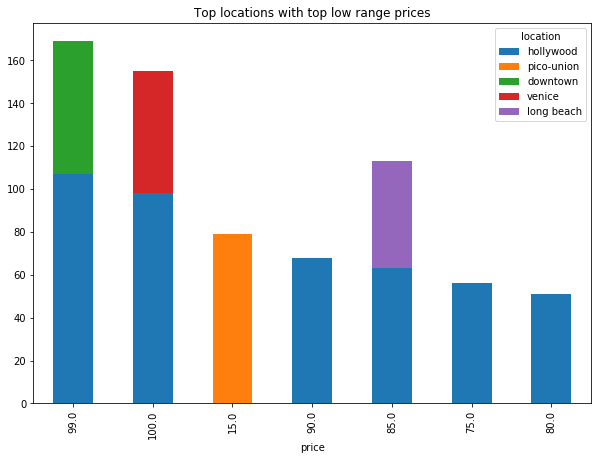

In [272]:
## Checking the low prices in the Low range for the top 10 places 
low_1 = df1[df1.priceType=='Low'].groupby(['price'])['location'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True,figsize=(10,7));
plt.title('Top locations with top low range prices')
plt.show()
## Almost all the top 10 prices are in the locations below 

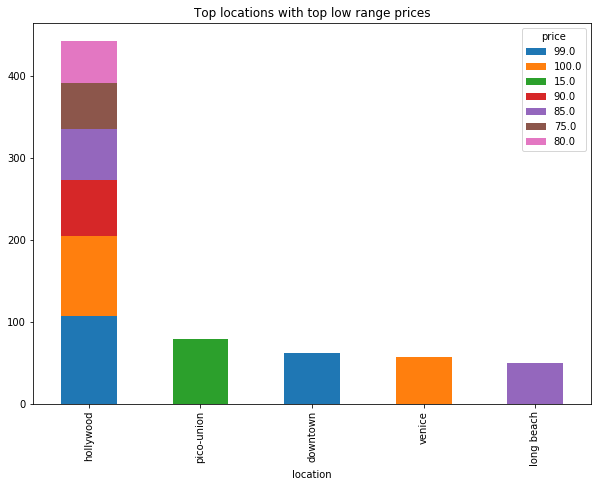

In [273]:
## Checking the low prices in the Low range for the top 10 places 
low_2 = df1[df1.priceType=='Low'].groupby(['location'])['price'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True,figsize=(10,7));
plt.title('Top locations with top low range prices')
plt.show()
## Almost all the top 10 prices are in the locations below 

### <div class="alert alert-block alert-info">As observed above,Almost all of the prices in Low price range are located in Hollywood.<br>Other top locations with maximum low price range are: Venice, pico-union, Downtown and Long Beach.<br>The average price in the Low range is around $100   
</div> 

##### <font color='blue'> Checking the Mid price range closely to see what kind of prices in the Mid range 

In [265]:
## Making a midRange dataframe which has all the values with the priceType as "Mid"
midRnge = pd.DataFrame(df1[df1.priceType=='Mid'])
midRnge.head(2)

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,location,state,zipcode,latitude,longitude,wifi,ac,pet,park,htub,dishwasher,bbq,pool,hr,coffee,heating,iron,washer,dryer,parking,amenities,priceType
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,122.0,500.0,240.0,3,$25.00,30,730,culver city,CA,90230,33.98209,-118.38494,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,wifi air conditioning pet park hot tub pool ...,Mid
2,168.0,0.0,100.0,6,$0.00,2,14,burbank,CA,91505,34.16562,-118.33458,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,wifi air conditioning pet park dishwasher BBQ...,Mid


In [266]:
## Importing the markercluster module from the folium library 
mc = MarkerCluster()

## Assigning base_mid to save the map
### making the world map to zoom on the latitude and longitude of LA county as maximum 
### number of airbnb listings are in LA county.
base_mid = folium.Map(location=[midRnge.latitude.mean(), 
 midRnge.longitude.mean()], 
 zoom_start=10)##This simply zoom in on the CA state

## For every value in the Mid range airbnb's put a popup marker with the Airbnb per night
## prices
for row in midRnge.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude, row.longitude],popup=row.price))

base_mid.add_child(mc)    
## Saving the map in html format in the current directory with the name map_midprices
base_mid.save('map_midprices.html')

##### <div class="alert alert-block alert-danger"> Please note, you might have to run the jupyter notebook to see the map below or refer to the map_<name>.html for map details 

##### <font color='blue'> Second, lets have a closer look into the mid range rates...

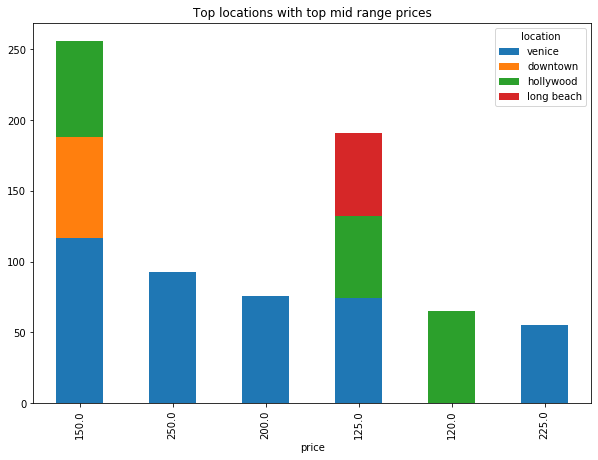

In [277]:
## Checking the mid prices in the Mid range for the top 10 places 
mid_1 = df1[df1.priceType=='Mid'].groupby(['price'])['location'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True,figsize=(10,7));
plt.title('Top locations with top mid range prices')
plt.show()
## Almost all the top 10 prices are in the locations below 

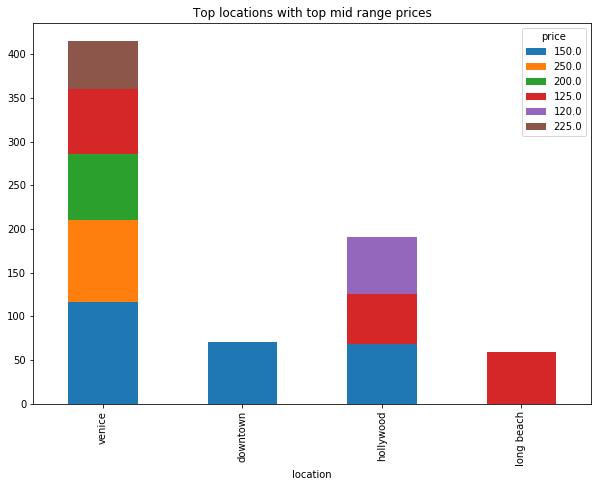

In [278]:
## Checking the mid prices in the Mid range for the top 10 places 
mid_2 = df1[df1.priceType=='Mid'].groupby(['location'])['price'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True,figsize=(10,7));
plt.title('Top locations with top mid range prices')
plt.show()
## Almost all the top 10 prices are in the locations below 


### <div class="alert alert-block alert-info">As observed above,Almost all of the prices in the Mid price range are located in Venice.<br>Other top locations with maximum mid price range are: Hollywood, Downtown and Long Beach.<br>The average price in the Mid range is around $150-200   
</div> 

In [279]:
## Making a highRange dataframe which has all the values with the priceType as "High"
highRnge = pd.DataFrame(df1[df1.priceType=='High'])
highRnge.head(2)

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,location,state,zipcode,latitude,longitude,wifi,ac,pet,park,htub,dishwasher,bbq,pool,hr,coffee,heating,iron,washer,dryer,parking,amenities,priceType
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67,900.0,3000.0,400.0,1,$0.00,31,1125,santa monica,CA,90401,34.00906,-118.49282,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,wifi air conditioning pet park hot tub he...,High
111,600.0,2500.0,200.0,4,$25.00,4,730,venice,CA,90291,33.99201,-118.46990,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,wifi air conditioning park coffee heatin...,High


In [280]:
## Importing the markercluster module from the folium library 
mc = MarkerCluster()

## Assigning base_high to save the map
### making the world map to zoom on the latitude and longitude of LA county as maximum 
### number of airbnb listings are in LA county.
base_high = folium.Map(location=[highRnge.latitude.mean(), 
 highRnge.longitude.mean()], 
 zoom_start=10)##This simply zoom in on the CA state

## For every value in the High range airbnb's put a popup marker with the Airbnb per night
## prices
for row in highRnge.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude,  row.longitude],popup=row.price))
    
base_high.add_child(mc)    
## Saving the map in html format in the current directory with the name map_highprices
base_high.save('map_highprices.html')

##### <div class="alert alert-block alert-danger"> Please note, you might have to run the jupyter notebook to see the map below or refer to the map_<name>.html for map details 

##### <font color='blue'>Now, lets have a closer look into the high range rates...

In [281]:
## Finding out which listing has the highest price per night!
high_info = df1[df1.priceType=='High']
high_info.location[high_info['price']==25000]

id
17480    hollywood hills west
Name: location, dtype: object

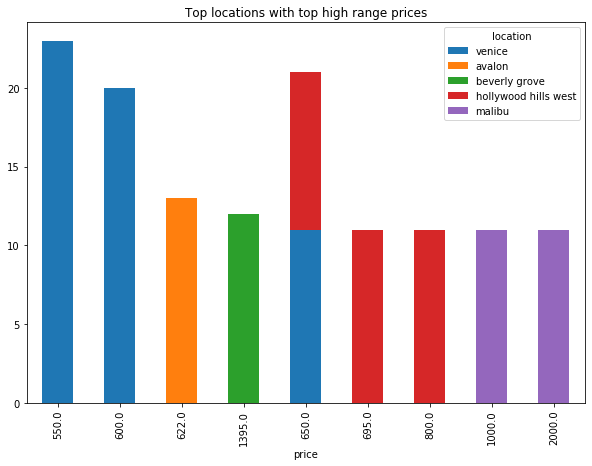

In [284]:
## Checking the high prices in the High range for the top 10 places 
high_1 = df1[df1.priceType=='High'].groupby(['price'])['location'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True,figsize=(10,7));
plt.title('Top locations with top high range prices')
plt.show()
## Almost all the top 10 prices are in the locations below 

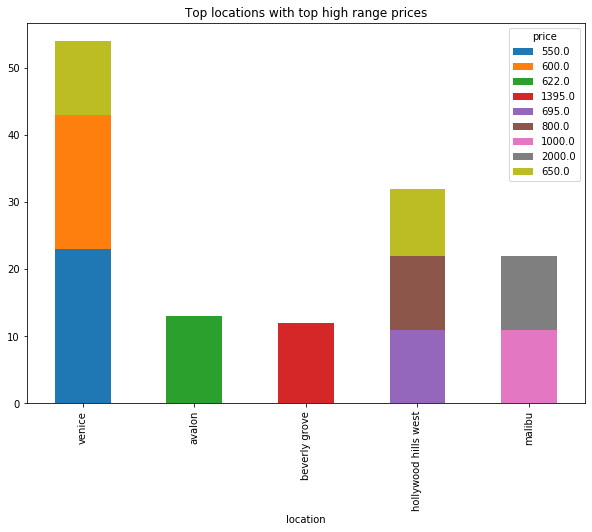

In [285]:
## Checking the high prices in the High range for the top 10 places 
high_1 = df1[df1.priceType=='High'].groupby(['location'])['price'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True,figsize=(10,7));
plt.title('Top locations with top high range prices')
plt.show()
## Almost all the top 10 prices are in the locations below 

### <div class="alert alert-block alert-info">As observed above,Almost all of the prices in the High price range are located in Venice and Beverly grove.Venice seems a real versatile location for Airbnb listings.<br>Other top locations with maximum high price range are: Hollywood hills West, Malibu and Avalon.<br>The average price in the High range is around $550-800   
</div> 

### 2) We will be try to predict the priceType column for the Airbnb df1 dataset listing using H2o.ai, an autoML tool. These efforts have been taken to understand whether having a ML model to tag our price column as Low,High,Mid is a profitable solution or not. As affordability is based around the price, we have choosen build a ML model to predict the priceType column 

#### <font color='blue'> An overview on the test data diagnostics:
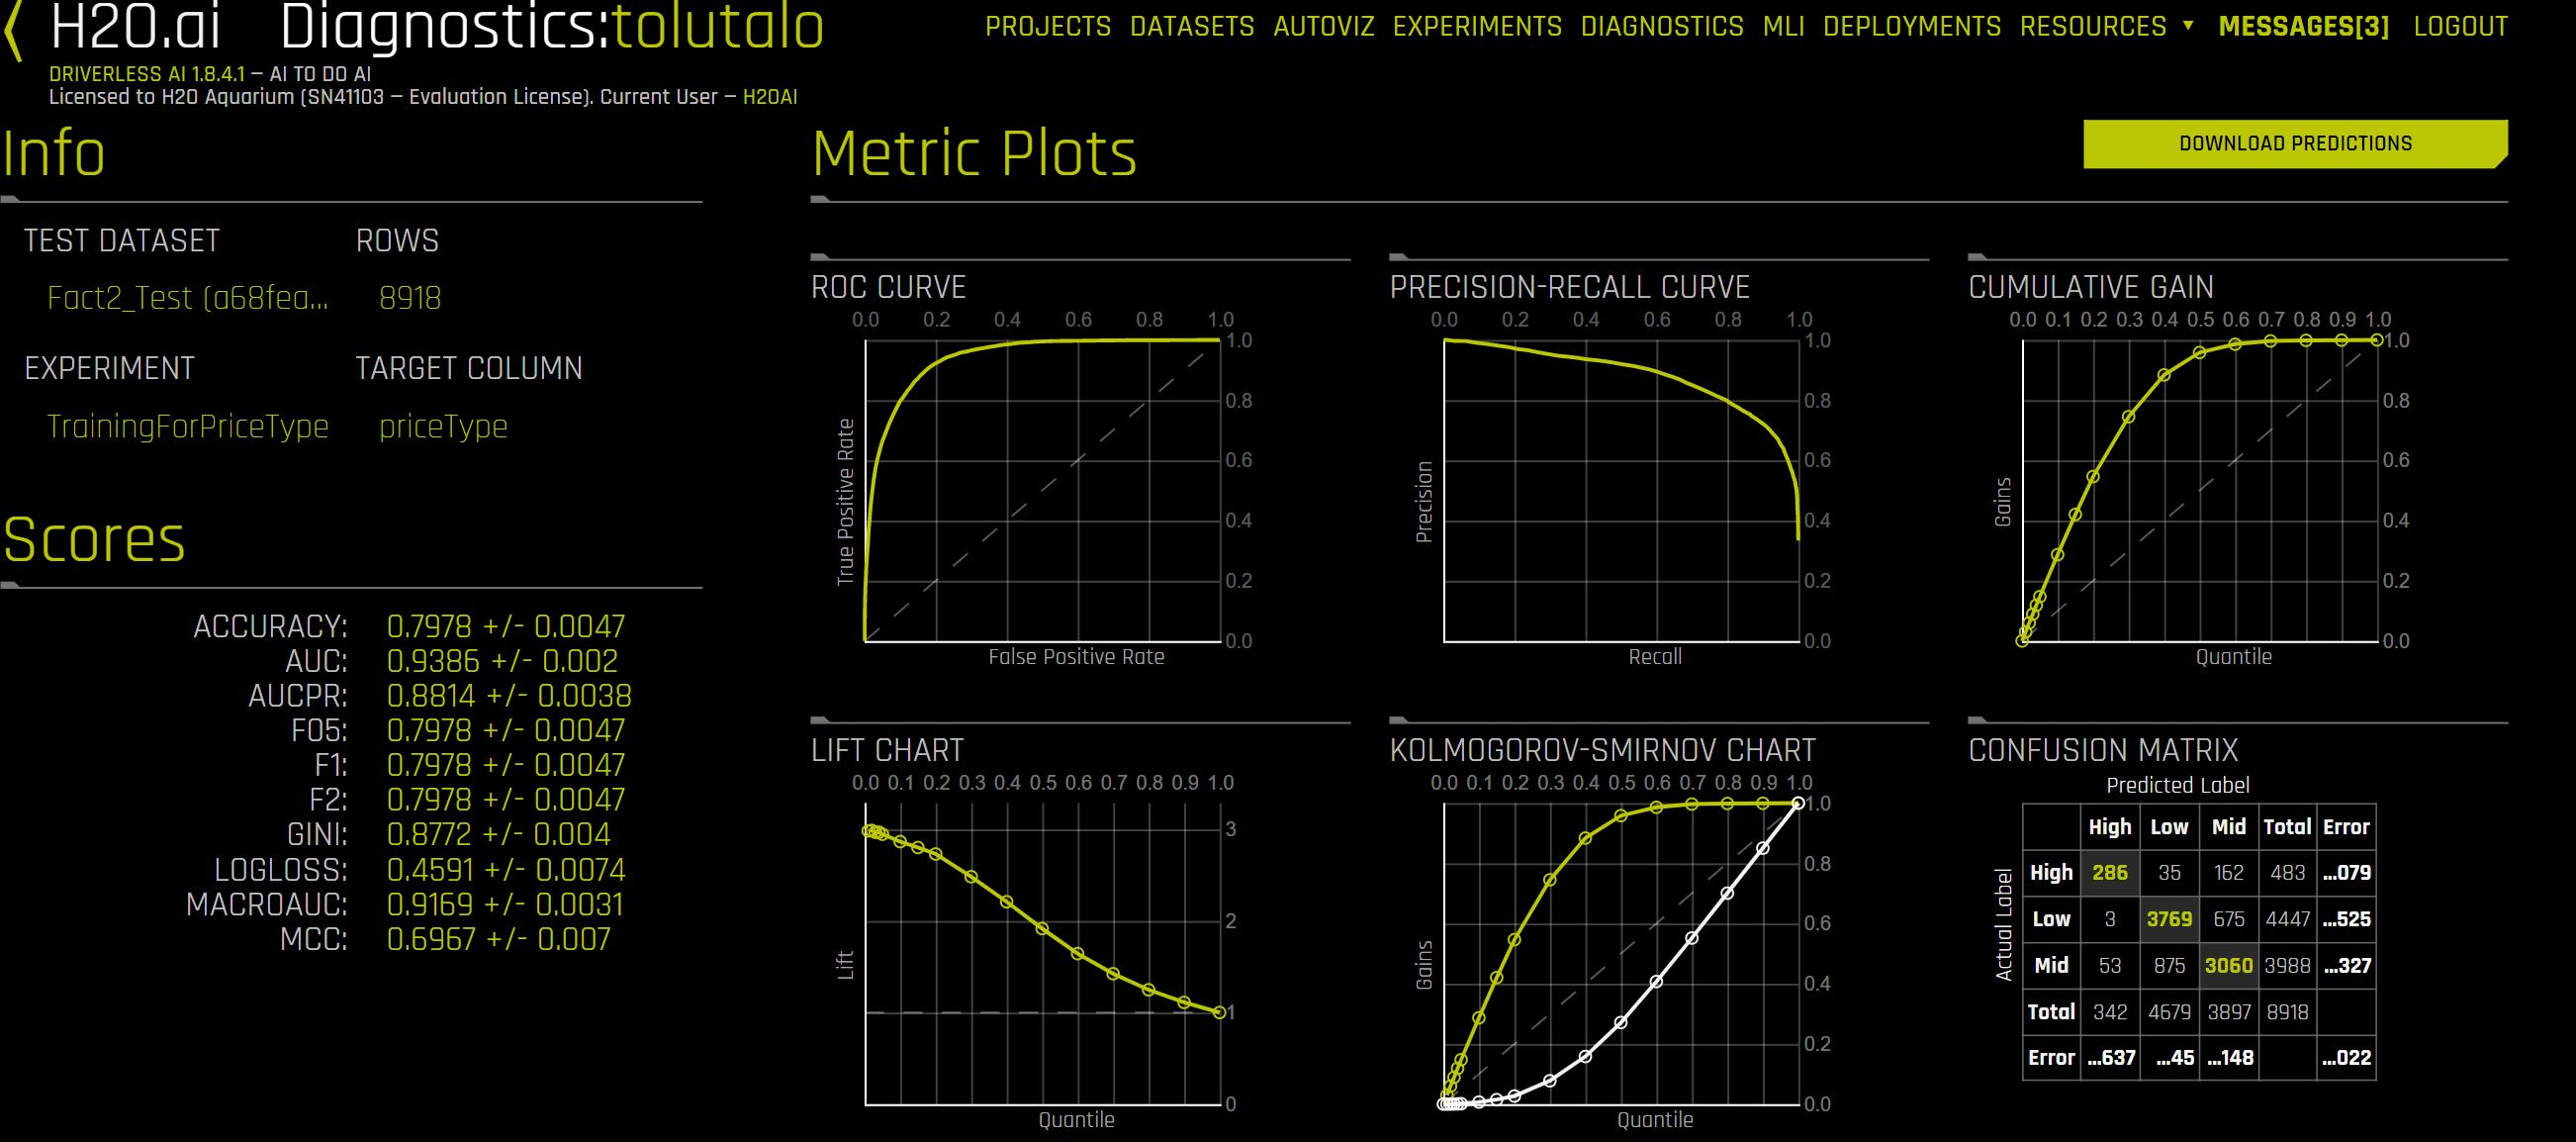

We downloaded the df1 dataFrame as AffordabilityDataset.csv and uploaded on H2O.ai to check hoe accurately a ML model predicts the PriceType column in this DataSet. 
First, we split the dataset in 80-20 ratio for Train-Test datasets.Then made a ML model using the Train dataset. 

### Experiment Pipeline:
For this experiment, Driverless AI performed the following steps to find the optimal final model: 

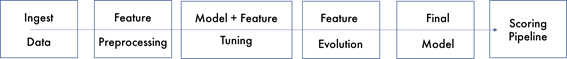

<ul>The steps in this pipeline are described in more detail below:
<li><b>Ingest Data:</b><br></li>
           o detected column types 
<li><b>Feature Preprocessing:</b><br></li>
           o turned raw features into numeric
<li><b>Model and Feature Tuning:</b><br></li>
    This stage combines random hyperparameter tuning with feature selection and generation.     The best performing model and features are then passed to the feature evolution stage.<br>
           o found the optimal parameters for xgboost, constant and lightgbm models by training models with different parameters.<br>
           o the best parameters are those that generate the largestGINI on the internal validation data.<br>
           o 5  models trained and scored to evaluate features and model parameters.<br>
<li><b>Feature Evolution:</b><br></li>
    o	found the best representation of the data for the final model training by creating and evaluating 103 features over 13 iterations.<br> 
o	trained and scored 8 models to further evaluate engineered features.<br>
<li><b>Final Model:</b><br></li>
    o	created the best model from the feature engineering iterations 
    
</ul>
 

In [360]:
df_automl = pd.read_csv("./Fact_1_predictions/test_dataset_pricetype.csv")

##### <font color='blue'> To see how accurate the predictions on the priceType column are, we will create new columns which will verify the actual values in the priceType column against the predicted columns

In [361]:
df_automl.head()

,priceType,priceType.High,priceType.Low,priceType.Mid
0,Low,0.001431,0.833623,0.164946
1,Low,0.520631,0.120209,0.359160
2,Mid,0.044935,0.009807,0.945258
3,Low,0.000525,0.972476,0.027000
4,Low,0.000838,0.979509,0.019653


In [365]:
df_automl.rename(columns={"priceType.High":"predicted_High","priceType.Low":"predicted_Low",\
                         "priceType.Mid":"predicted_Mid"},inplace=True)

In [366]:
df_automl['actualType_High'] = df_automl.priceType.str.\
contains('High').apply(lambda x:1 if x==True else 0)
df_automl['actualType_Mid'] = df_automl.priceType.str.\
contains('Mid').apply(lambda x:1 if x==True else 0) 
df_automl['actualType_Low'] =  df_automl.priceType.str.\
contains('Low').apply(lambda x:1 if x==True else 0) 

In [367]:
df_automl

,priceType,predicted_High,predicted_Low,predicted_Mid,actualType_High,actualType_Mid,actualType_Low
0,Low,0.001431,0.833623,0.164946,0,0,1
1,Low,0.520631,0.120209,0.359160,0,0,1
2,Mid,0.044935,0.009807,0.945258,0,1,0
3,Low,0.000525,0.972476,0.027000,0,0,1
4,Low,0.000838,0.979509,0.019653,0,0,1
...,...,...,...,...,...,...,...
8913,High,0.153015,0.183567,0.663418,1,0,0
8914,Mid,0.417571,0.007187,0.575242,0,1,0
8915,Mid,0.005657,0.136146,0.858197,0,1,0
8916,Low,0.006794,0.895136,0.098070,0,0,1


In [370]:
df_automl['accuracy_High'] = (df_automl.actualType_High) - (df_automl.predicted_High)
df_automl['accuracy_Mid'] = (df_automl.actualType_Mid) - (df_automl.predicted_Mid)
df_automl['accuracy_Low'] = (df_automl.actualType_Low) - (df_automl.predicted_Low)

In [371]:
df_automl

,priceType,predicted_High,predicted_Low,predicted_Mid,actualType_High,actualType_Mid,actualType_Low,accuracy_High,accuracy_Mid,accuracy_Low
0,Low,0.001431,0.833623,0.164946,0,0,1,-0.001431,-0.164946,0.166377
1,Low,0.520631,0.120209,0.359160,0,0,1,-0.520631,-0.359160,0.879791
2,Mid,0.044935,0.009807,0.945258,0,1,0,-0.044935,0.054742,-0.009807
3,Low,0.000525,0.972476,0.027000,0,0,1,-0.000525,-0.027000,0.027524
4,Low,0.000838,0.979509,0.019653,0,0,1,-0.000838,-0.019653,0.020491
...,...,...,...,...,...,...,...,...,...,...
8913,High,0.153015,0.183567,0.663418,1,0,0,0.846985,-0.663418,-0.183567
8914,Mid,0.417571,0.007187,0.575242,0,1,0,-0.417571,0.424758,-0.007187
8915,Mid,0.005657,0.136146,0.858197,0,1,0,-0.005657,0.141803,-0.136146
8916,Low,0.006794,0.895136,0.098070,0,0,1,-0.006794,-0.098070,0.104864


### Fact 2: Customer detailed review based analysis 

In [431]:
df2 = initFile[['name','property_type', 'room_type', 'neighbourhood_cleansed', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews', 'first_review', 'last_review',  'minimum_nights',
       'price', 'reviews_per_month', 'host_response_time', 'cancellation_policy']].copy()

In [373]:
df2['number_of_reviews'].value_counts()

0      8661
1      3774
2      2610
3      1846
4      1526
       ... 
495       1
463       1
447       1
526       1
479       1
Name: number_of_reviews, Length: 472, dtype: int64

In [374]:
df2.shape

(44620, 19)

In [433]:
df2.drop(df2[df2.number_of_reviews.values==0].index,axis=0,inplace=True)

In [376]:
df2.shape

(35959, 19)

In [434]:
df2.groupby('neighbourhood_cleansed')['property_type'].count().nlargest(5)

neighbourhood_cleansed
Venice          2363
Hollywood       2228
Downtown        1407
Long Beach      1400
Santa Monica     889
Name: property_type, dtype: int64

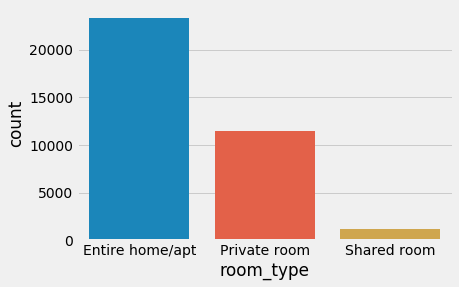

In [507]:
sns.countplot(df2['room_type'])

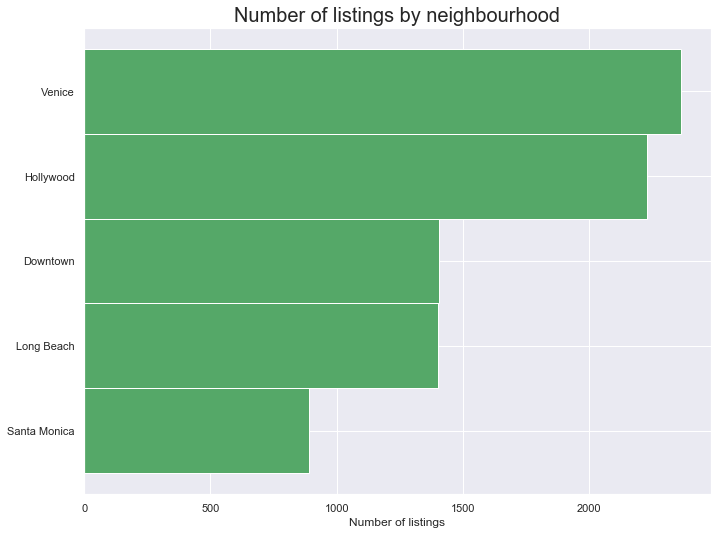

In [598]:
feq=df2['neighbourhood_cleansed'].value_counts().nlargest(5).\
    sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='g', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [436]:
df2.property_type.value_counts()

Apartment                13206
House                    12067
Guesthouse                2186
Condominium               1965
Guest suite               1375
Townhouse                 1137
Bungalow                  1106
Loft                       842
Villa                      609
Hostel                     236
Serviced apartment         231
Cottage                    176
Bed and breakfast          160
Camper/RV                  133
Other                       97
Boutique hotel              82
Tiny house                  68
Cabin                       67
Hotel                       37
Aparthotel                  35
Farm stay                   23
Tent                        20
Castle                      16
Boat                        15
Chalet                      13
Treehouse                   10
Tipi                         7
Yurt                         7
Barn                         5
Earth house                  5
Campsite                     3
Houseboat                    3
Dorm    

In [601]:
## Converting other apartment type listings to Apartment 
df2.property_type.loc[df2.property_type.values=='Serviced apartment'] = 'Apartment'
df2.property_type.loc[df2.property_type.values=='Aparthotel'] = 'Apartment'

## Converting other house type listings to House 
df2.property_type.loc[df2.property_type.values=='Villa'] = 'House'
df2.property_type.loc[df2.property_type.values=='Cottage'] = 'House'
df2.property_type.loc[df2.property_type.values=='Bungalow'] = 'House'
df2.property_type.loc[df2.property_type.values=='Tiny house'] = 'House'
df2.property_type.loc[df2.property_type.values=='Chalet'] = 'House'
df2.property_type.loc[df2.property_type.values=='Farm stay'] = 'House'
df2.property_type.loc[df2.property_type.values=='Cabin'] = 'House'
df2.property_type.loc[df2.property_type.values=='Dome house'] = 'House'

## Converting other guesthouse type listings to Guesthouse 
df2.property_type.loc[df2.property_type.values=='Guest suite'] = 'Guesthouse'

## Converting other guesthouse type listings to Hotel
df2.property_type.loc[df2.property_type.values=='Boutique hotel'] = 'Hotel'
df2.property_type.loc[df2.property_type.values=='Bed and breakfast'] = 'Hotel'

## Converting other hostel type listings to Hostel
df2.property_type.loc[df2.property_type.values=='Dorm'] = 'Hostel'

## Converting other hostel type listings to Hostel
df2.property_type.loc[df2.property_type.values=='Campsite'] = 'Camper/RV'


top5types = df2.property_type.value_counts().nlargest(5).index

df2.property_type.value_counts()

House          14132
Apartment      13472
Guesthouse      3561
Condominium     1965
Other           1692
Townhouse       1137
Name: property_type, dtype: int64

In [602]:
top5types

Index(['House', 'Apartment', 'Guesthouse', 'Condominium', 'Other'], dtype='object')

In [603]:
df2.loc[~df2.property_type.isin(top5types),'property_type'] = 'Other'
df2.property_type.value_counts()

House          14132
Apartment      13472
Guesthouse      3561
Other           2829
Condominium     1965
Name: property_type, dtype: int64

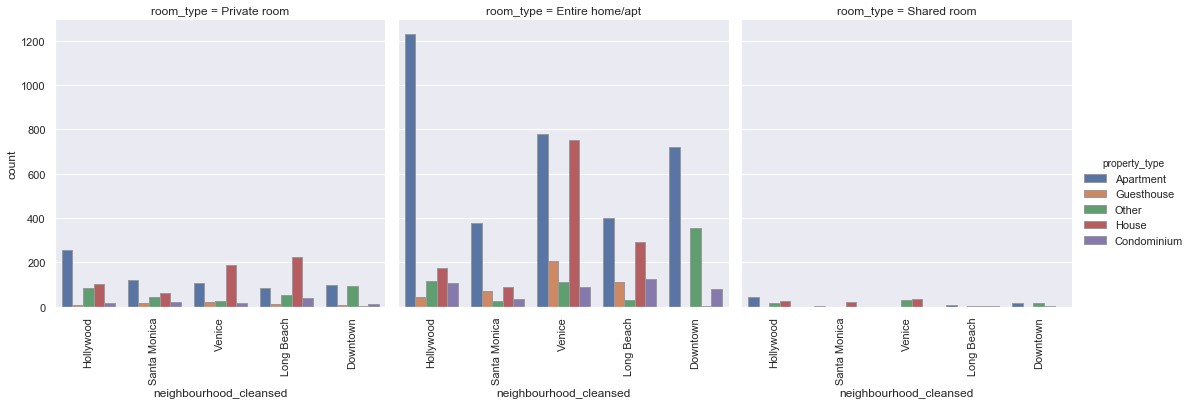

In [604]:
#grabbing top 5 neighbourhoods for sub-dataframe
sub_7=df2.loc[df2['neighbourhood_cleansed'].\
                 isin(['Venice','Hollywood','Downtown','Long Beach',
                 'Santa Monica'])]

#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood_cleansed',\
                  col='room_type', data=sub_7,\
                   kind='count',hue='property_type',edgecolor=".6")
viz_3.set_xticklabels(rotation=90)


#### <font color='blue'> Grouping the top 10 property types with the number of reviews

In [605]:
df2.groupby('property_type')['number_of_reviews'].count().nlargest(5)

property_type
House          14132
Apartment      13472
Guesthouse      3561
Other           2829
Condominium     1965
Name: number_of_reviews, dtype: int64

In [495]:
df2.dtypes

name                            object
property_type                   object
room_type                       object
neighbourhood_cleansed          object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
number_of_reviews                int64
first_review                    object
last_review                     object
minimum_nights                   int64
price                           object
reviews_per_month              float64
host_response_time              object
cancellation_policy             object
dtype: object

In [606]:
property_col = df2.property_type.value_counts().nlargest(5)

### Top 10 property types by the number of reviews

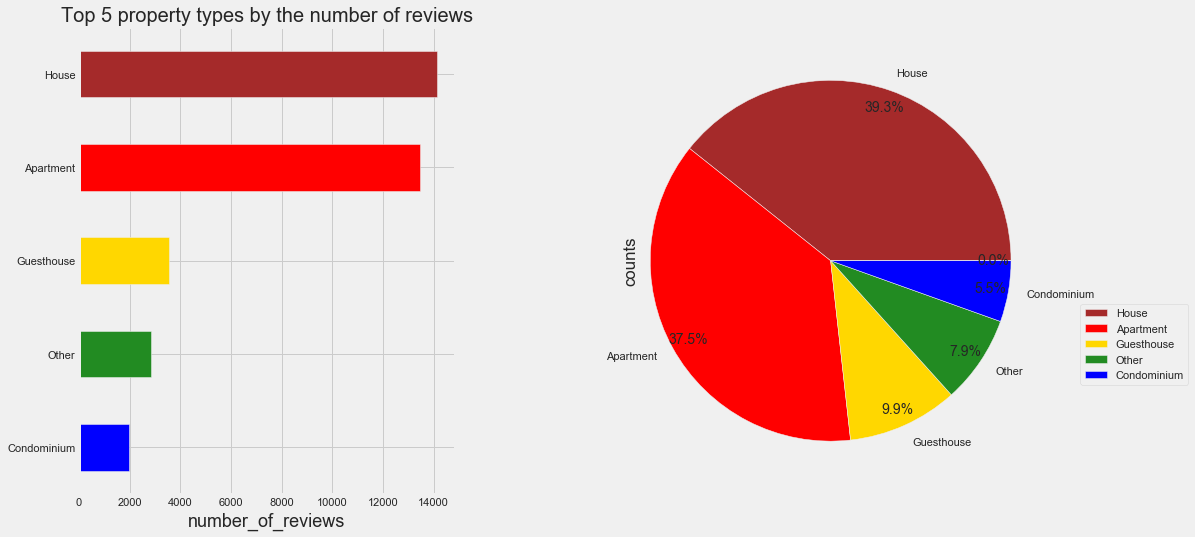

In [614]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "brown")
df2.property_type.value_counts().sort_values(ascending=False)[:5].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 5 property types by the number of reviews",size=20)
ax[0].set_xlabel('number_of_reviews',size=18)


count=df2['property_type'].value_counts()
groups=list(df2['property_type'].value_counts().index)[:5]
counts=list(count[:5])
counts.append(count.agg(sum)-count[:5].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=("brown","red", "gold", "forestgreen","blue")
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()


### Specific type of reviews which people look at when booking an airbnb

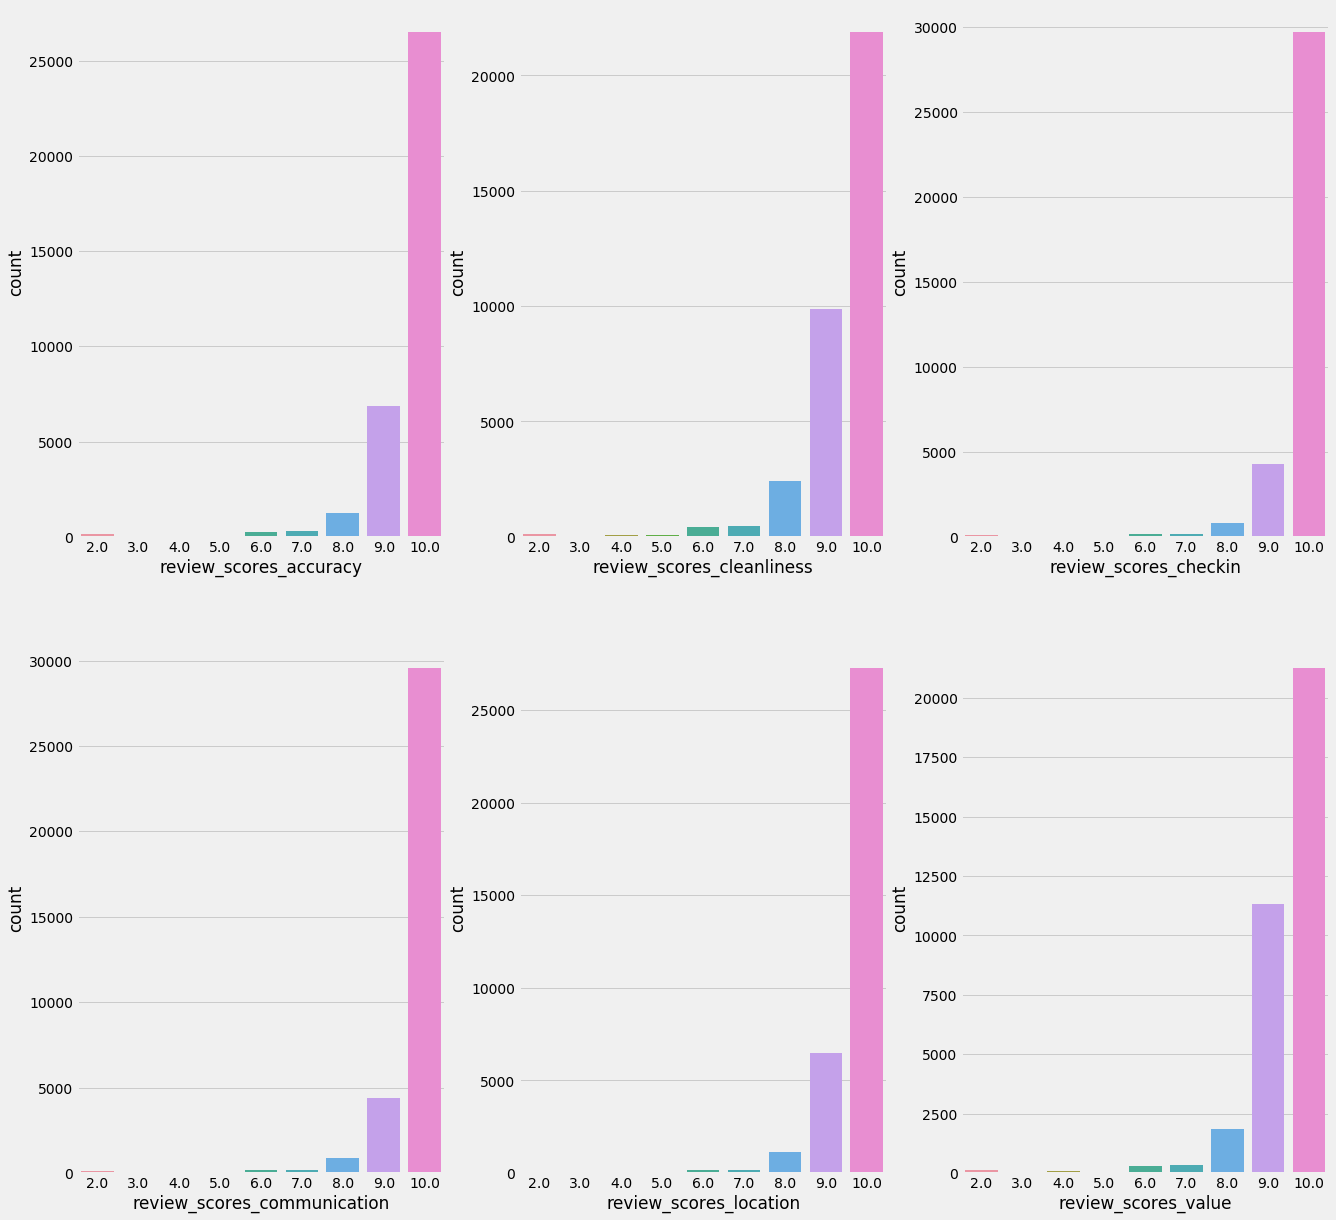

In [499]:
fig,axes= plt.subplots(nrows=2, ncols= 3,figsize=(20,20))


sns.countplot(df2['review_scores_accuracy'],ax=axes[0][0])        

sns.countplot(df2['review_scores_cleanliness'],ax=axes[0][1])

sns.countplot(df2['review_scores_checkin'],ax=axes[0][2])

sns.countplot(df2['review_scores_communication'],ax=axes[1][0])

sns.countplot(df2['review_scores_location'],ax=axes[1][1])
sns.countplot(df2['review_scores_value'],ax=axes[1][2])

### Overall review rating score for each property type with respective its room_type

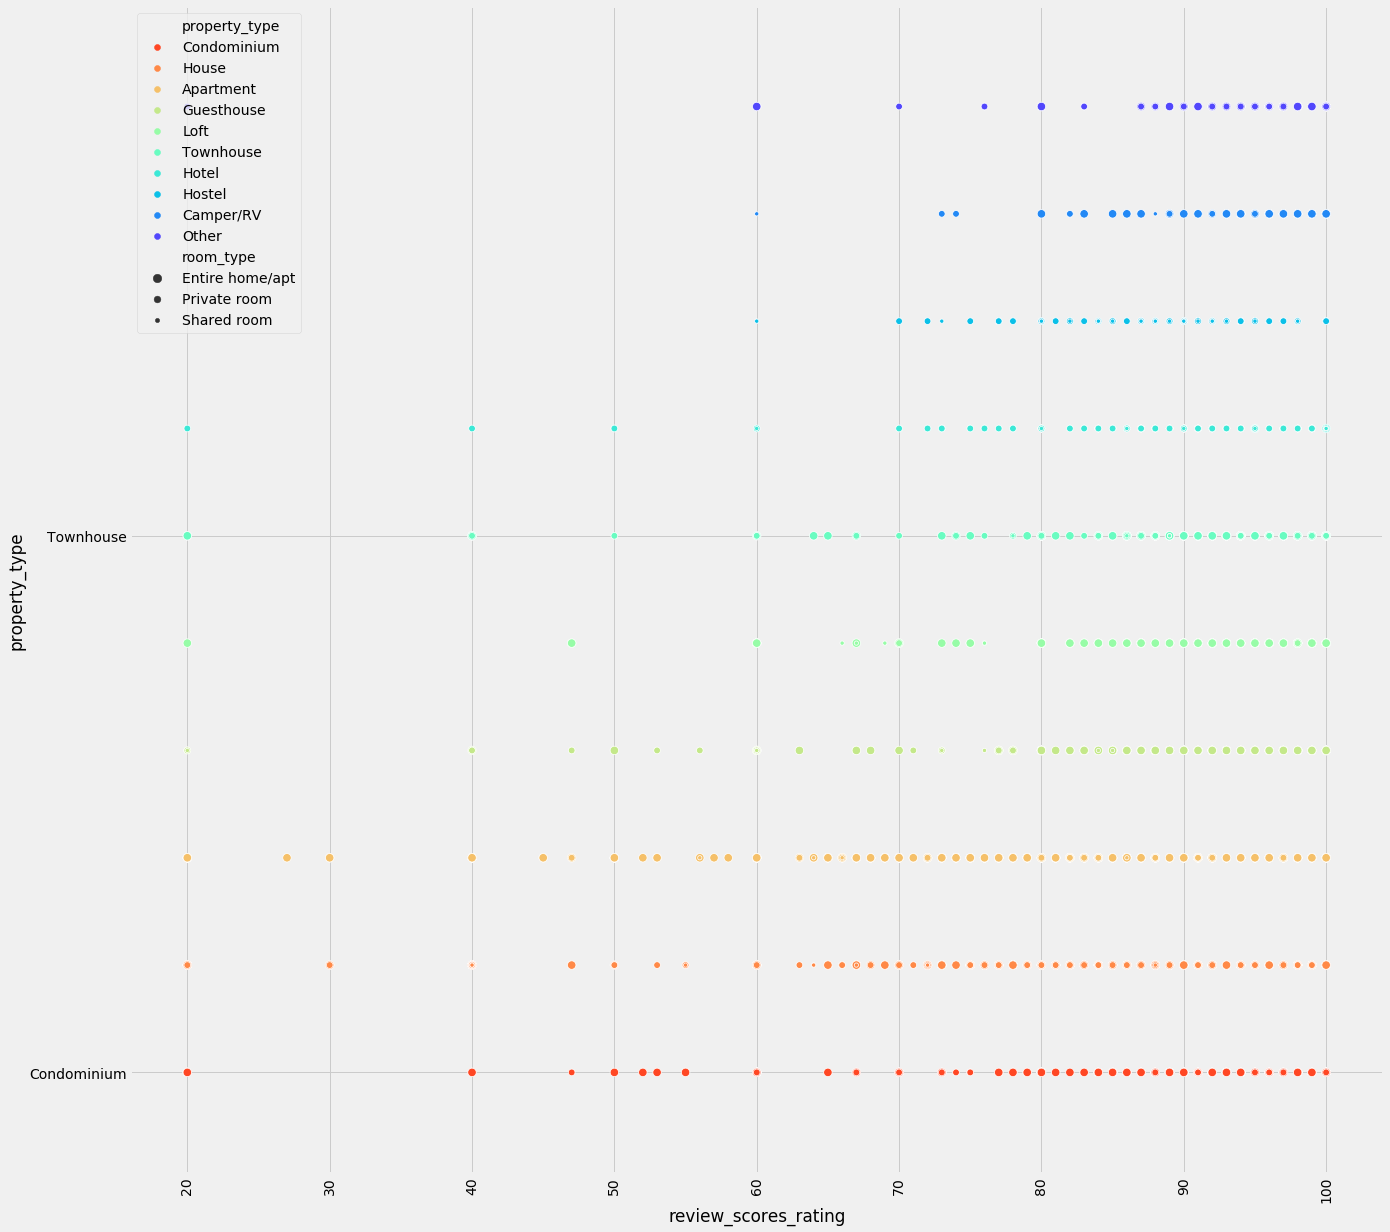

In [500]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,105,5))
sns.scatterplot(y='property_type',x='review_scores_rating',size='room_type',\
                hue=,palette='rainbow_r',data=df2)

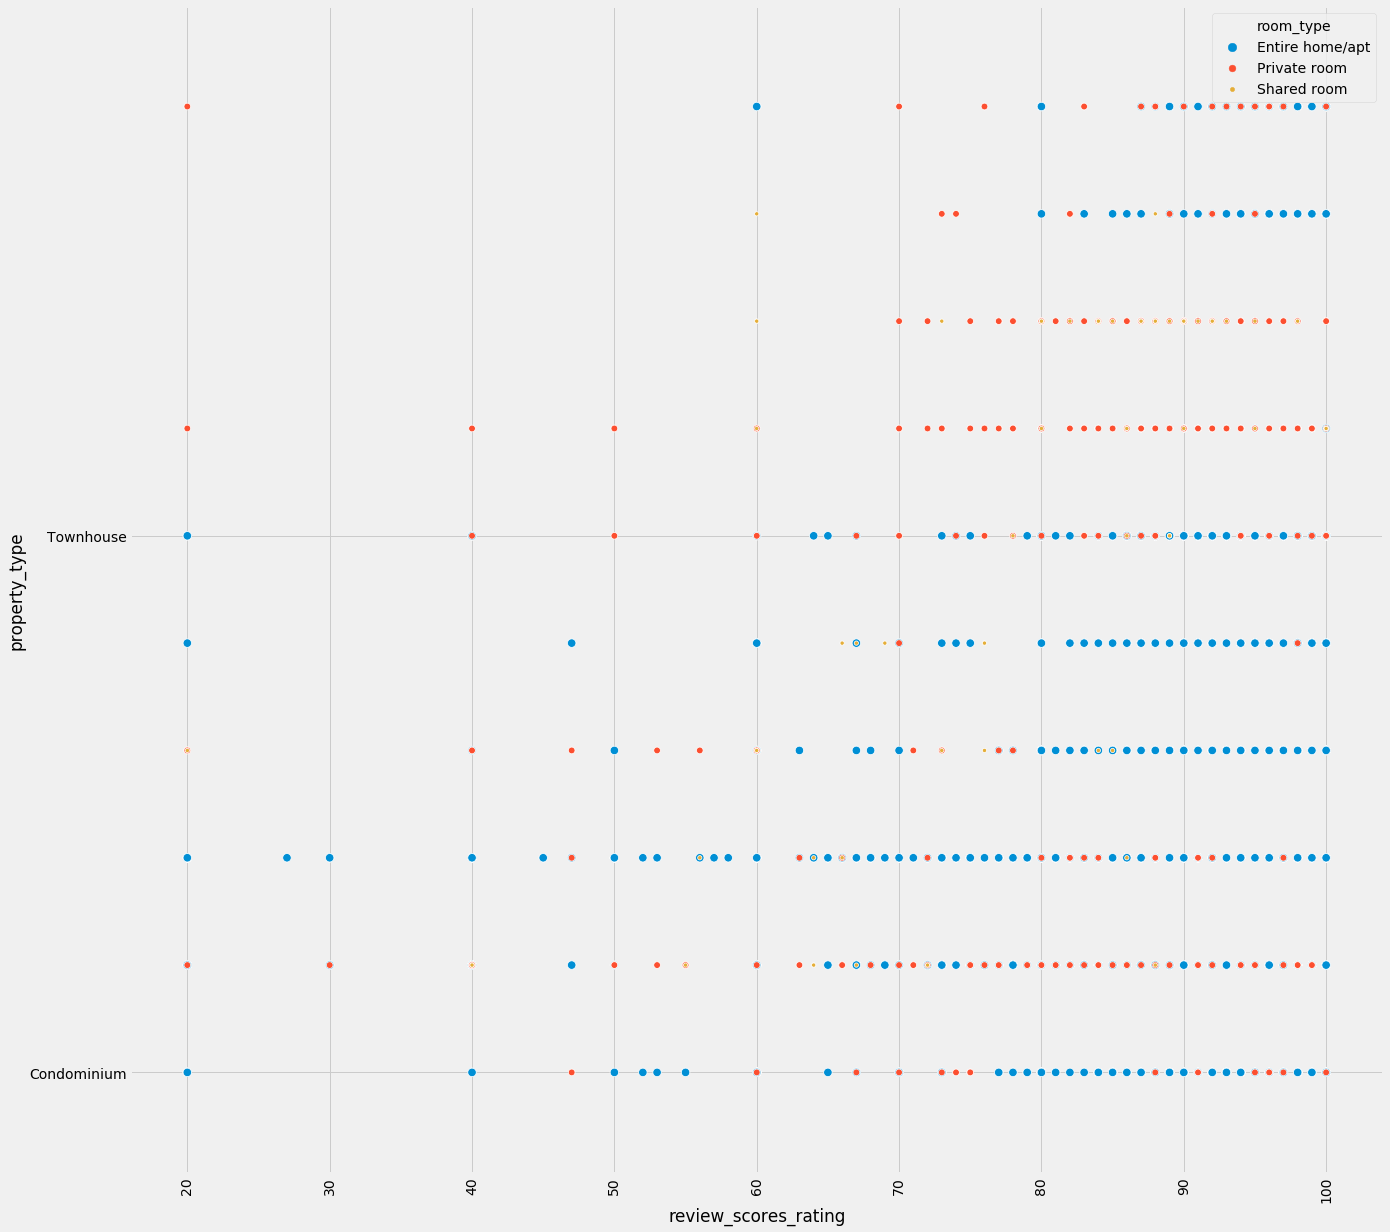

In [501]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,105,5))
sns.scatterplot(y='property_type',x='review_scores_rating',size='room_type',hue='room_type',data=df2)

In [502]:
df2['room_type'].value_counts()

Entire home/apt    23294
Private room       11435
Shared room         1230
Name: room_type, dtype: int64

### Host response time for each of the property type

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_time',hue='property_type',size='room_type',y='property_type',palette='rainbow',data=df2)

### <div class="alert alert-block alert-info">Some key observations from the graph are:<br>1. We can see that Apartment style listings are highest in number in all four neighborhoods except Staten Island. Staten Island has more ‘House’ style property than ‘Apartments’.<br>This analysis seems intuitive, as we know that Staten Island is not that densely populated and has a lot of space.<br>2. The maximum apartment style listings are located in Manhattan, constituting 90% of all properties in that neighborhood. Next is Brooklyn with 75% Apartment style listing followed by Queens with 60% apartment style.<br>3. Queens and Bronx also have a lot of House style listings. Queens constitute 25% House style properties, which is greatest after Staten Islands. <br></div>

### <font color='blue'> Fact 3: Based on the Transit column given by the hosts, the customer gets information of only those Airbnbs

In [615]:
df3 = initFile.copy()

In [616]:
df3.dtypes

listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 105, dtype: object

In [617]:
## Convert the transit column into lower case
df3.transit = df3.transit.str.lower()

In [618]:
df3['airport'] = ''
df3['tourist'] = ''
df3['beach'] = ''
df3['downtown'] = ''
df3['transport'] = ''
#df3['bike'] = ''
df3['restaurant'] = ''
df3['hollywood'] = ''

##### <font color='blue'> We choose the most important and sought after transit and tourist attractions and created columns for the same

In [619]:
df3['airport'] = df3.transit.str.contains("airport").apply(lambda x: 'airport' if x==True else '')
df3['tourist'] = df3.transit.str.contains("tourist").apply(lambda x: 'tourist' if x==True else '')
df3['beach'] = df3.transit.str.contains("beach").apply(lambda x: 'beach' if x==True else '')
df3['downtown'] = df3.transit.str.contains("downtown").apply(lambda x: 'downtown' if x==True else '')
df3['transport'] = df3.transit.str.contains("transport").apply(lambda x: 'transport' if x==True else '')
#df3['bike'] = df3.transit.str.contains("bike").apply(lambda x: 'bike' if x==True else '')
df3['restaurant'] = df3.transit.str.contains("restaurant").apply(lambda x: 'restaurant' if x==True else '')
df3['hollywood'] = df3.transit.str.contains("hollywood").apply(lambda x: 'hollywood' if x==True else '')

##### <font color='blue'> Dropping the old transit column 

In [620]:
df3.drop('transit',axis=1,inplace=True)

##### <font color='blue'> Assigning the most popular transit and customer attraction column values

In [621]:
df3['transit'] = df3.airport+' '+df3.tourist+' '+df3.beach+' '+\
df3.downtown+' '+df3.transport+' '+\
' '+df3.restaurant+' '+df3.hollywood


##### <font color='blue'> One hot encoding the most important transit and customer attractions 

In [622]:
df3.airport = df3.airport.apply(lambda x: 1 if x=='airport' else 0)
df3.tourist = df3.tourist.apply(lambda x: 1 if x=='tourist' else 0)
df3.beach = df3.beach.apply(lambda x:1 if x=='beach' else 0)
df3.downtown = df3.downtown.apply(lambda x:1 if x=='downtown' else 0)
df3.transport = df3.transport.apply(lambda x:1 if x=='transport' else 0)
df3.hollywood = df3.hollywood.apply(lambda x:1 if x=='hollywood' else 0)

##### <font color='blue'> We will now look at the Airbnb's according to the customer preference of transit or travel importance

In [623]:
## Creating a DataFrame with only those listings near and around the airport 
nearAirport = pd.DataFrame(df3[df3.airport==1])
nearAirport.count()

listing_url     2270
scrape_id       2270
last_scraped    2270
name            2270
summary         2260
                ... 
downtown        2270
transport       2270
restaurant      2270
hollywood       2270
transit         2270
Length: 112, dtype: int64

##  

In [624]:
def fancy_html(row): ## Defining a function for editing the popups for markers
    i = row 
    price = df3['price'].iloc[i]   
    property_type = df3['property_type'].iloc[i]         ## making variable for every row 
    room_type = df3['room_type'].iloc[i]                           
    accommodates = df3['accommodates'].iloc[i]
    bedrooms = df3['bedrooms'].iloc[i] 
    bathrooms = df3['bathrooms'].iloc[i]                                           
    review_scores_rating = df['review_scores_rating'].iloc[i]
    
    left_col_colour = "#2A799C" ## Defining colur for the left column 
    right_col_colour = "#C5DCE7" ## Defining colur for the right column 
    
    ## HTML code starts here
    html = """<!DOCTYPE html> 
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}</h4>""".format(property_type) + """

</head>
    <table style="height: 126px; width: 400px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Room_type</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(room_type) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Accommodates</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(accommodates) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Bedrooms</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(bedrooms) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Bathrooms</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(bathrooms) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Rating(out of 100)</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(review_scores_rating) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Per night rate</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(price) + """
</tr>
</tbody>
</table>
</html>
"""
    return html ## Above, we have created a html table with the information from the dataframe passed
## return the html table we created 

In [ ]:
## Assigning base_low to save the map
### making the world map to zoom on the latitude and longitude of LA county as maximum 
### number of airbnb listings are in LA county
map_airport = folium.Map(location=[nearAirport.latitude.mean(), 
 nearAirport.longitude.mean()], 
 zoom_start=7)##This simply zoom in on the CA state

mc = MarkerCluster()

## For every value in the map_airport range airbnb's put a popup marker with the Airbnb per night
## prices
for i in range(0,len(nearAirport)): ##For range till length of nearAirport dataframe 
    html = fancy_html(i) ## Apply the html table style to the iframes 
     
## IFrame of width and height in the popup, set the table defined in the html cell above         
    iframe = branca.element.IFrame(html=html,width=400,height=300)
    popup = folium.Popup(iframe,parse_html=True)

## Make clusters and add the popup to the markers which are of info sign icon shape
    mc.add_child(folium.Marker([nearAirport.latitude.iloc[i],nearAirport.longitude.iloc[i]],
                  popup=popup,icon=folium.Icon( icon='info-sign')))

## Add the clusters to the airport map 
map_airport.add_child(mc) 

## Save the map to map_airport.html
map_airport.save('map_airport.html')

##### <div class="alert alert-block alert-danger"> Please note, you might have to run the jupyter notebook to see the map below or refer to the map_<name>.html for map details 

In [629]:
## Creating a DataFrame with only those listings near and around the beach 
nearBeach = pd.DataFrame(df3[df3.beach==1])
nearBeach.count()

listing_url     4393
scrape_id       4393
last_scraped    4393
name            4393
summary         4370
                ... 
downtown        4393
transport       4393
restaurant      4393
hollywood       4393
transit         4393
Length: 112, dtype: int64

In [ ]:
## Assigning base_low to save the map
### making the world map to zoom on the latitude and longitude of LA county as maximum 
### number of airbnb listings are in LA county
map_nearBeach = folium.Map(location=[nearBeach.latitude.mean(), 
 nearBeach.longitude.mean()], 
 zoom_start=7)##This simply zoom in on the CA state

mc = MarkerCluster()


for i in range(0,len(nearBeach)):##For range till length of nearAirport dataframe 
    html = fancy_html(i) ## Apply the html table style to the iframes 
 
    ## IFrame of width and height in the popup, set the table defined in the html cell above         
    iframe = branca.element.IFrame(html=html,width=400,height=300)
    popup = folium.Popup(iframe,parse_html=True)
    
    ## Make clusters and add the popup to the markers which are of info sign icon shape
    mc.add_child(folium.Marker([nearBeach.latitude.iloc[i],nearBeach.longitude.iloc[i]],
                  popup=popup,icon=folium.Icon( icon='info-sign')))

## Add the clusters to the airport map 
map_nearBeach.add_child(mc) 

## Save the map to map_airport.html
map_nearBeach.save('map_nearBeach.html')

##### <div class="alert alert-block alert-danger"> Please note, you might have to run the jupyter notebook to see the map below or refer to the map_<name>.html for map details 

In [631]:
## Creating a DataFrame with only those listings near and around hollywood 
nearhollywood= pd.DataFrame(df3[df3.hollywood==1])
nearhollywood.count()

listing_url     4732
scrape_id       4732
last_scraped    4732
name            4732
summary         4716
                ... 
downtown        4732
transport       4732
restaurant      4732
hollywood       4732
transit         4732
Length: 112, dtype: int64

In [ ]:
## Assigning base_low to save the map
### making the world map to zoom on the latitude and longitude of LA county as maximum 
### number of airbnb listings are in LA county
map_nearhollywood = folium.Map(location=[nearhollywood.latitude.mean(), 
 nearhollywood.longitude.mean()], 
 zoom_start=7)##This simply zoom in on the CA state

mc = MarkerCluster()

## For every value in the map_airport range airbnb's put a popup marker with the Airbnb per night
## prices
for i in range(0,len(nearhollywood)):
    html = fancy_html(i)

    ## IFrame of width and height in the popup, set the table defined in the html cell above         
    iframe = branca.element.IFrame(html=html,width=400,height=300)
    popup = folium.Popup(iframe,parse_html=True)

    ## Make clusters and add the popup to the markers which are of info sign icon shape
    mc.add_child(folium.Marker([nearhollywood.latitude.iloc[i],nearhollywood.longitude.iloc[i]],
                  popup=popup,icon=folium.Icon( icon='info-sign')))

## Add the clusters to the airport map 
map_nearhollywood.add_child(mc) 

## Save the map to map_airport.html
map_nearhollywood.save('map_nearhollywood.html')

##### <div class="alert alert-block alert-danger"> Please note, you might have to run the jupyter notebook to see the map below or refer to the map_<name>.html for map details 

##### <font color='green'> Lets look at the accuracy of these transit and attractions given above in the host's description

In [639]:
df_beaches = pd.read_csv('Beaches_and_Marinas.csv')
df_beaches.head(1)

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,city,state,zip,hours,phones,url,info1,info2,description,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y,post_id
0,-118.237015,33.765574,157210452,HSIP Freedom Gnis_cultural_fe,1733013.0,Arts and Recreation,Beaches and Marinas,NaN,US Geological Survey (USGS) & LA County,Terminal Island Marina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://egis3.lacounty.gov/lms/?p=24236,publish,33.765574,-118.237015,2010-11-01T19:50:56.000Z,NaN,NaN,6.489630e+06,1.737152e+06,24236


In [640]:
chk_beaches =  df_beaches[['latitude','longitude','Name']].copy()